In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/TANNERU/Downloads/Dataset for coding/cleaned_hm.csv")

In [3]:
df

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection
...,...,...,...,...,...,...,...,...,...
100530,128762,112,24h,My husband announced he is getting a decent bo...,My husband announced he is getting a decent bo...,True,1,NaN,affection
100531,128763,714,24h,Had a can of Pepsi to drink.,Had a can of Pepsi to drink.,True,1,NaN,enjoy_the_moment
100532,128764,3934,24h,Cuddling with my girlfriend last night.,Cuddling with my girlfriend last night.,True,1,affection,affection
100533,128765,1629,24h,I had a great meeting yesterday at work with m...,I had a great meeting yesterday at work with m...,True,1,NaN,bonding


In [4]:
df.isnull().sum()

hmid                         0
wid                          0
reflection_period            0
original_hm                  0
cleaned_hm                   0
modified                     0
num_sentence                 0
ground_truth_category    86410
predicted_category           0
dtype: int64

In [5]:
df['predicted_category'].value_counts()

affection           34168
achievement         33993
enjoy_the_moment    11144
bonding             10727
leisure              7458
nature               1843
exercise             1202
Name: predicted_category, dtype: int64

In [6]:
df['num_sentence'].value_counts()

1     83711
2      9542
3      3847
4      1624
5       821
6       336
7       183
8       107
10       68
9        61
11       35
13       26
12       21
16       17
18       17
14       14
17       14
19       12
21       10
25        7
15        7
23        7
24        5
26        5
22        4
29        3
31        3
30        3
20        3
27        2
32        2
37        2
40        2
56        1
46        1
53        1
51        1
48        1
69        1
35        1
45        1
44        1
42        1
58        1
34        1
28        1
60        1
Name: num_sentence, dtype: int64

In [7]:
#deleting num_sentences  which are having more that 10 sentences in a word
mod_df = df.loc[df['num_sentence']<=10]

In [8]:
mod_df

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection
...,...,...,...,...,...,...,...,...,...
100530,128762,112,24h,My husband announced he is getting a decent bo...,My husband announced he is getting a decent bo...,True,1,NaN,affection
100531,128763,714,24h,Had a can of Pepsi to drink.,Had a can of Pepsi to drink.,True,1,NaN,enjoy_the_moment
100532,128764,3934,24h,Cuddling with my girlfriend last night.,Cuddling with my girlfriend last night.,True,1,affection,affection
100533,128765,1629,24h,I had a great meeting yesterday at work with m...,I had a great meeting yesterday at work with m...,True,1,NaN,bonding


In [9]:
mod_df['num_sentence'].value_counts()

1     83711
2      9542
3      3847
4      1624
5       821
6       336
7       183
8       107
10       68
9        61
Name: num_sentence, dtype: int64

In [10]:
mod_df['predicted_category'].value_counts()

affection           34020
achievement         33966
enjoy_the_moment    11115
bonding             10700
leisure              7458
nature               1839
exercise             1202
Name: predicted_category, dtype: int64

In [11]:
X = mod_df['cleaned_hm'].values
Y = mod_df['predicted_category']

In [12]:
print(X)

['I went on a successful date with someone I felt sympathy and connection with.'
 'I was happy when my son got 90% marks in his examination '
 'I went to the gym this morning and did yoga.' ...
 'Cuddling with my girlfriend last night.'
 "I had a great meeting yesterday at work with my boss and a few colleagues and we went out for lunch afterward; everybody was excited by the projects we're working on and how efficient our team is."
 'I had a great workout last night.']


In [13]:
print(Y)

0                affection
1                affection
2                 exercise
3                  bonding
4                affection
                ...       
100530           affection
100531    enjoy_the_moment
100532           affection
100533             bonding
100534            exercise
Name: predicted_category, Length: 100300, dtype: object


# LabelEncoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [15]:
print(Y)

[1 1 4 ... 1 2 4]


In [16]:
from collections import Counter
print(Counter(Y)) #alphabetic order

Counter({1: 34020, 0: 33966, 3: 11115, 2: 10700, 5: 7458, 6: 1839, 4: 1202})


# Onehotencoding

In [17]:
Y = Y.reshape(-1,1)

In [18]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(categories = 'auto')
Y = onehot.fit_transform(Y).toarray()

In [19]:
#print(Y)
print(Y.shape)

(100300, 7)


In [20]:
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

# Data cleaning

In [21]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [22]:
ps = PorterStemmer()
lemma = WordNetLemmatizer()
corpus = []

In [23]:
X[9]

'Watching cupcake wars with my three teen children'

In [24]:
type(X)

numpy.ndarray

In [25]:
len(X)

100300

In [26]:
for i in range(0,len(X)):
    review = re.sub('[^a-zA-Z]',' ',X[i])
    review = review.lower()
    review = review.split()
    #stemming
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    #lemmatising
    #review = [lemma.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [27]:
len(corpus)

100300

In [31]:
corpus[0]

'went success date someon felt sympathi connect'

In [32]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding

In [33]:
vocab_size = 27000

# OneHot

In [34]:
onehot = [one_hot(d,vocab_size)for d in corpus]

In [35]:
len(onehot)

100300

In [36]:
onehot[3]

[3884, 1531, 5678, 24193, 25567, 444, 24314, 16774, 20027]

# padding

In [37]:
max_length = 55

In [39]:
pad_docs = pad_sequences(onehot,padding='pre',maxlen = max_length)

In [40]:
len(pad_docs)

100300

In [43]:
len(pad_docs[999])

55

In [45]:
pad_docs.shape

(100300, 55)

# Creating Model

In [46]:
dimensions = 100

In [48]:
model = Sequential()
model.add(Embedding(vocab_size,dimensions,input_length = max_length))
model.add(Dropout(0.3))
model.add(LSTM(500))
model.add(Dropout(0.3))
model.add(Dense(7,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [51]:
X_in = np.array(pad_docs)#inputs
Y = np.array(Y)#targets

In [52]:
X_in.shape

(100300, 55)

In [53]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_in,Y,test_size = 0.25,random_state = 42) 

In [54]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(75225, 55)
(25075, 55)
(75225, 7)
(25075, 7)


In [60]:
cl = model.fit(Xtrain,Ytrain,validation_data =(Xtest,Ytest),epochs = 10,batch_size = 512)

Train on 75225 samples, validate on 25075 samples
Epoch 1/10
75225/75225 [==============================] - 458s 6ms/step - loss: 0.4675 - acc: 0.8403 - val_loss: 0.4058 - val_acc: 0.8600
Epoch 2/10
75225/75225 [==============================] - 436s 6ms/step - loss: 0.3439 - acc: 0.8819 - val_loss: 0.3635 - val_acc: 0.8730
Epoch 3/10
75225/75225 [==============================] - 410s 5ms/step - loss: 0.2884 - acc: 0.8995 - val_loss: 0.3465 - val_acc: 0.8803
Epoch 4/10
75225/75225 [==============================] - 409s 5ms/step - loss: 0.2552 - acc: 0.9103 - val_loss: 0.3442 - val_acc: 0.8810
Epoch 5/10
75225/75225 [==============================] - 407s 5ms/step - loss: 0.2319 - acc: 0.9185 - val_loss: 0.3400 - val_acc: 0.8797
Epoch 6/10
75225/75225 [==============================] - 410s 5ms/step - loss: 0.2150 - acc: 0.9233 - val_loss: 0.3474 - val_acc: 0.8794
Epoch 7/10
75225/75225 [==============================] - 406s 5ms/step - loss: 0.2040 - acc: 0.9269 - val_loss: 0.3690 - 

In [62]:
predict = model.predict(Xtest)
print(predict)

[[1.7274641e-04 9.9777943e-01 8.2602055e-05 ... 1.0212841e-06
  6.1786780e-04 1.4250710e-05]
 [9.9896467e-01 1.5538852e-04 6.5380933e-05 ... 2.7275280e-04
  2.9146243e-04 1.4449414e-05]
 [3.7999564e-01 6.1977565e-01 1.8717618e-04 ... 5.1743802e-07
  9.5518726e-06 1.4011897e-06]
 ...
 [9.9898249e-01 2.5831739e-04 6.5051190e-06 ... 1.1813347e-05
  5.5156602e-04 3.0281112e-06]
 [7.2049553e-04 9.9726725e-01 1.5063814e-04 ... 6.2182726e-06
  5.4085111e-05 6.5122484e-05]
 [9.9510324e-01 1.7892317e-03 3.5924074e-04 ... 7.4505333e-05
  2.8923783e-04 1.0213278e-04]]


In [72]:
predict.shape

(25075, 7)

In [142]:
Ypred = [np.argmax(no) for no in predict]
#print(Ypred)
#print(Ypred.shape)
print(Ypred[:10])
print(Ytest.shape)

[1, 0, 1, 5, 1, 1, 3, 0, 1, 3]
(25075, 7)


In [143]:
Ypred1 = np.array(Ypred)
Ypred1 = Ypred1.reshape(-1,1)

In [144]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(categories = 'auto')
Ypred2 = onehot.fit_transform(Ypred1).toarray()

In [145]:
print(Ypred2.shape)

(25075, 7)


In [146]:
Ypred2[:10]

array([[0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

In [147]:
Ytest[:10]

array([[0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

In [148]:
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(Ytest,Ypred2))

[[[15716   833]
  [ 1111  7415]]

 [[15989   658]
  [  524  7904]]

 [[22244   196]
  [  185  2450]]

 [[21546   721]
  [  772  2036]]

 [[24718    39]
  [   60   258]]

 [[22651   516]
  [  377  1531]]

 [[24480   143]
  [   77   375]]]


In [149]:
Ytest1 = np.argmax(Ytest,axis = 1 )
print(Ytest1.shape)

(25075,)


In [150]:
Ytest1[:15]

array([1, 0, 0, 5, 1, 1, 3, 0, 1, 3, 0, 0, 0, 1, 0], dtype=int64)

In [151]:
Ypred1[:15]

array([[1],
       [0],
       [1],
       [5],
       [1],
       [1],
       [3],
       [0],
       [1],
       [3],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [124]:
from collections import Counter
print(Counter(Ytest1)) #alphabetic order

Counter({0: 8526, 1: 8428, 3: 2808, 2: 2635, 5: 1908, 6: 452, 4: 318})


In [152]:
Ypred = np.array(Ypred)
from collections import Counter
print(Counter(Ypred)) #alphabetic order

Counter({1: 8562, 0: 8248, 3: 2757, 2: 2646, 5: 2047, 6: 518, 4: 297})


In [153]:
print(type(Ytest1))
print(type(Ypred1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [127]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest1,Ypred1))

[[7415  357   69  361   21  248   55]
 [ 211 7904   88  133    3   66   23]
 [  72   57 2450   40    1   11    4]
 [ 376  162   27 2036    8  168   31]
 [  25    7    1    6  258    9   12]
 [ 125   56   11  165    2 1531   18]
 [  24   19    0   16    4   14  375]]


In [116]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Ytest,Ypred2))

0.8761316051844467


# Data Visualization

In [65]:
import matplotlib.pyplot as plt

In [67]:
cl.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

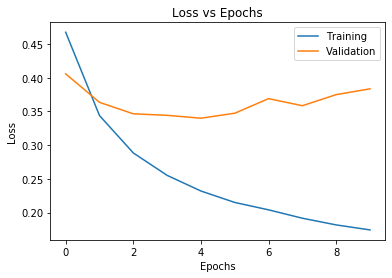

In [68]:
#Loss visualization
plt.plot(cl.history['loss'],label = 'Training')
plt.plot(cl.history['val_loss'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


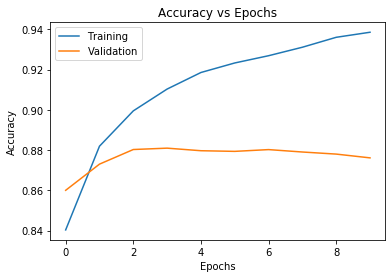

In [69]:
#Accuracy visualization
plt.plot(cl.history['acc'],label = 'Training')
plt.plot(cl.history['val_acc'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()